In [98]:
print('Working directory',dir)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import MaxNLocator
import os
from matplotlib import ticker
plt.rcParams['ytick.right']  =plt.rcParams['xtick.top'] =True
xminorLocator=MultipleLocator(2)

def cm2inch(value):
    return value/2.54

plt.rcParams['figure.figsize'] = (cm2inch(8), cm2inch(6.5))
#plt.rcParams['figure.figsize'] =(4,3)#(3.5,2.5)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.labelsize'] = 6
plt.rcParams['ytick.labelsize'] = 6
plt.rcParams['legend.fontsize'] = 6

from matplotlib import rcParams
config = {
    "text.usetex": False,
    "font.family":'serif',
    # "font.family":'stix',
    "font.size": 8,
    "mathtext.fontset":'stix',
    # "font.serif": ['SimSun'],
}
rcParams.update(config)
from mpl_toolkits.mplot3d import Axes3D
import numpy 
def setlabel(ax, label, loc=2, borderpad=0.6, **kwargs):
    legend = ax.get_legend()
    if legend:
        ax.add_artist(legend)
    line, = ax.plot(numpy.NaN,numpy.NaN,color='none',label=label,fillstyle='full')
    label_legend = ax.legend(handles=[line],
                             loc=[-0.2,1.0005],
                             handlelength=0.0,
                             handleheight=0.0,
                             handletextpad=0.0,
                             borderaxespad=0.0,
                             borderpad=borderpad,
                             frameon=False,
                             shadow=True,
                             facecolor='gray',
                             prop={'weight':'bold','size':8},
                             **kwargs)
    label_legend.remove()
    ax.add_artist(label_legend)
    line.remove()
def setlabelm(ax, label, loc, borderpad=0.6, **kwargs):
    legend = ax.get_legend()
    if legend:
        ax.add_artist(legend)
    line, = ax.plot(numpy.NaN,numpy.NaN,color='none',label=label)
    label_legend = ax.legend(handles=[line],
                             loc=loc,
                             handlelength=0,
                             handleheight=0,
                             handletextpad=0,
                             borderaxespad=0,
                             borderpad=borderpad,
                             frameon=False,
                             shadow=True,
                             facecolor='gray',
                             prop={'weight':'bold','size':8},
                             **kwargs)
    label_legend.remove()
    ax.add_artist(label_legend)
    line.remove()
def sciforyax(ax):
    formatter=ticker.ScalarFormatter(useMathText=True)
    formatter.set_scientific(True)
    formatter.set_powerlimits((0,0))
    ax.yaxis.set_major_formatter(formatter)
def sciforxax(ax):
    formatter=ticker.ScalarFormatter(useMathText=True)
    formatter.set_scientific(True)
    formatter.set_powerlimits((0,0))
    ax.xaxis.set_major_formatter(formatter)
cbformat=ticker.ScalarFormatter(useMathText=True,useOffset=True)
cbformat.set_powerlimits((-0,0))
cbformat.format="%.2f"

import matplotlib.ticker
class OOMFormatter(matplotlib.ticker.ScalarFormatter):
    def __init__(self, order=0, fformat="%.3f", offset=True, mathText=True):
        self.oom = order
        self.fformat = fformat
        matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_order_of_magnitude(self):
        self.orderOfMagnitude = self.oom
    def _set_format(self, vmin=None, vmax=None):
        self.format = self.fformat
        if self._useMathText:
             self.format = r'$\mathdefault{%s}$' % self.format
def fee(d):
    import os
    if (os.path.exists(d)):
        # print("The file exists. ")
        sz= os.path.getsize(d)
        if not sz:
            print(d," is empty!")
            return False
        else: 
            print("Size of ",d," is ", sz/1024,'KB' )
            return True
    else:
        print(d, " is not exists! ")
        return  False 
        
import  imageio
import os
def compose_gif(image_list,gif_name,myduration):
    frames=[]
    for image_name in image_list:
        frames.append(imageio.imread(image_name))
    imageio.mimsave(gif_name,frames,'GIF',duration=myduration)
    return


levels=100
figureDPI=1200
figureType=".jpeg"
timeUnit="fs"
def xyplot(int_dir,label_x,label_y,out_dir,*cmd):
    if os.path.exists(int_dir):
        data=np.loadtxt(int_dir)
        # plt.xlim(TimeTurn,TimeEnd)
        ax=plt.plot(data[:,0],data[:,1],'k-')#,data[:,0],data[:,2],'r-',data[:,0],1-data[:,1]-data[:,2],'b-')
        # plt.legend(["Gro","Exc","Ion"],loc=(0.7,0.70))
        plt.xlabel(label_x)
        plt.ylabel(label_y)
        if cmd:
            for i in cmd:
               eval(cmd[0])
        plt.savefig(out_dir+int_dir[-7:-4]+figureType,dpi=figureDPI,bbox_inches="tight")
    else:
        print("No dataset found.")
def xyzplot(int_dir,x_label,y_label,out_dir):
    if os.path.exists(int_dir):
        dat=np.loadtxt(int_dir)
        plt.tricontourf(dat[:,0],dat[:,1],dat[:,2],levels,cmap='jet')
        plt.colorbar()
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.savefig(out_dir+int_dir[-9:-4]+figureType,dpi=figureDPI,bbox_inches="tight")
        plt.show()
    else:
        print("The dataset does not exist. ")

Working directory D:\dataofpro\output\


In [99]:
dir="D:\\dataofpro\\output\\"

Size of  D:\dataofpro\output\efield_1.dat  is  1582.03125 KB


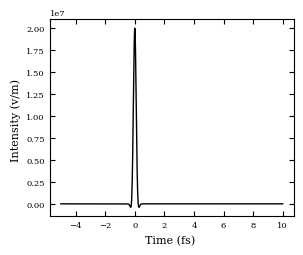

In [100]:
fil=dir+"efield_1.dat"
if fee(fil):
    xyplot(fil,'Time (fs) ','Intensity (v/m) ',dir)


Size of  D:\dataofpro\output\efield_2.dat  is  1582.03125 KB


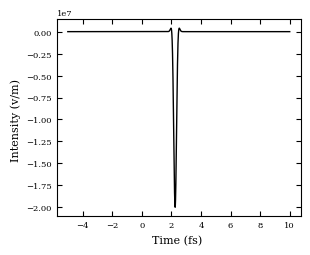

In [101]:
fil=dir+"efield_2.dat"
if fee(fil):
    xyplot(fil,'Time (fs) ','Intensity (v/m) ',dir)

Size of  D:\dataofpro\output\efield_rwa.dat  is  1582.03125 KB


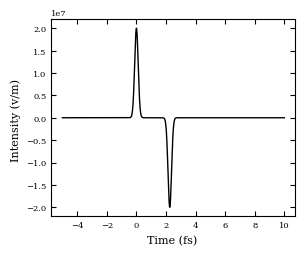

In [102]:
fil=dir+"efield_rwa.dat"
if fee(fil):
    xyplot(fil,'Time (fs) ','Intensity (v/m) ',dir)

Size of  D:\dataofpro\output\efield.dat  is  1582.03125 KB


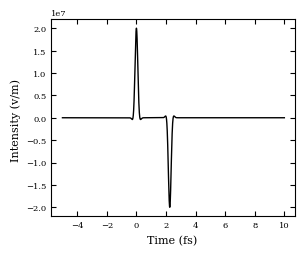

In [103]:
fil=dir+"efield.dat"
if fee(fil):
    xyplot(fil,'Time (fs) ','Intensity (v/m) ',dir)

Size of  D:\dataofpro\output\qr1.dat  is  13.5 KB


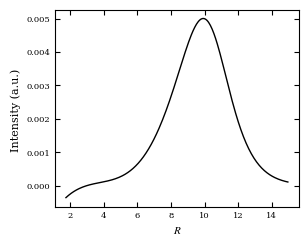

In [104]:
fil=dir+"qr1.dat"
if fee(fil):
    xyplot(fil,'$R$','Intensity (a.u.) ',dir)

Size of  D:\dataofpro\output\orientation\cos_even_state1.dat  is  158.203125 KB


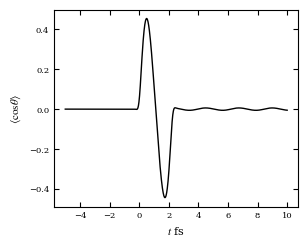

In [105]:
fil=dir+"orientation\\cos_even_state1.dat"
if fee(fil):
    xyplot(fil,'$t$ fs','$\\langle \\mathrm{cos}\\theta \\rangle$',dir)

Size of  D:\dataofpro\output\orientation\cos_odd_state1.dat  is  158.203125 KB


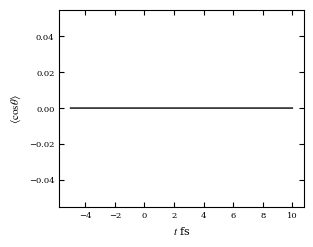

In [106]:
fil=dir+"orientation\\cos_odd_state1.dat"
if fee(fil):
    xyplot(fil,'$t$ fs','$\\langle \\mathrm{cos}\\theta \\rangle$',dir)

Size of  D:\dataofpro\output\orientation\cos_tot_state1.dat  is  158.203125 KB


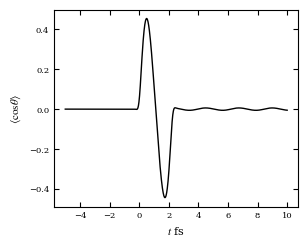

In [107]:
fil=dir+"orientation\\cos_tot_state1.dat"
if fee(fil):
    xyplot(fil,'$t$ fs','$\\langle \\mathrm{cos}\\theta \\rangle$',dir)

Size of  D:\dataofpro\output\alignment\cos2_even_state1.dat  is  158.203125 KB


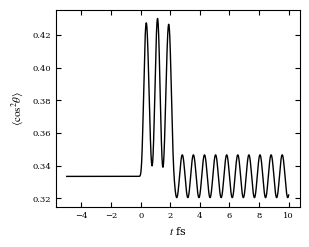

In [108]:
fil=dir+"alignment\\cos2_even_state1.dat"
if fee(fil):
    xyplot(fil,'$t$ fs','$\\langle \\mathrm{cos^2}\\theta \\rangle$',dir)

Size of  D:\dataofpro\output\alignment\cos2_odd_state1.dat  is  158.203125 KB


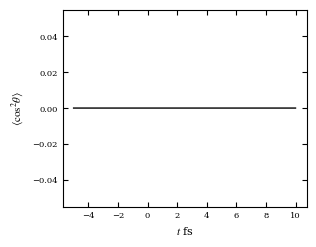

In [109]:
fil=dir+"alignment\\cos2_odd_state1.dat"
if fee(fil):
    xyplot(fil,'$t$ fs','$\\langle \\mathrm{cos^2}\\theta \\rangle$',dir)

Size of  D:\dataofpro\output\alignment\cos2_tot_state1.dat  is  158.203125 KB


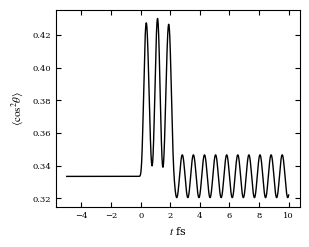

In [110]:
fil=dir+"alignment\\cos2_tot_state1.dat"
if fee(fil):
    xyplot(fil,'$t$ fs','$\\langle \\mathrm{cos^2}\\theta \\rangle$',dir)

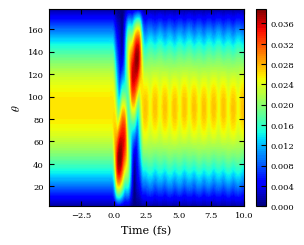

In [111]:
xyzplot(dir+'population\\state1_s1_v00_j00_pm00angpop.dat',
        'Time (fs)','$\\theta$',dir)

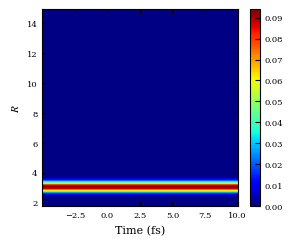

In [112]:
xyzplot(dir+'population\\state1_s1_v00_j00_pm00radpop.dat',
        'Time (fs)','$R$',dir)

In [ ]:
for i in range(0,len(dat)):
    if (dat[i,0])

In [118]:
def quickSort(arr, left=None, right=None):
    left = 0 if not isinstance(left,(int, float)) else left
    right = len(arr)-1 if not isinstance(right,(int, float)) else right
    if left < right:
        partitionIndex = partition(arr, left, right)
        quickSort(arr, left, partitionIndex-1)
        quickSort(arr, partitionIndex+1, right)
    return arr

def partition(arr, left, right):
    pivot = left
    index = pivot+1
    i = index
    while  i <= right:
        if arr[i] < arr[pivot]:
            swap(arr, i, index)
            index+=1
        i+=1
    swap(arr,pivot,index-1)
    return index-1

def swap(arr, i, j):
    arr[i], arr[j] = arr[j], arr[i]

In [120]:
import pandas as pd
dat=pd.DataFrame(dir+'time_wavepacket_distribution\\state01_v00_j00_pm00_wavepacket_polar_rot_ 2790ps.dat')
dat.sort_values(dat[0:1],ascending=(True,False))


ValueError: DataFrame constructor not properly called!

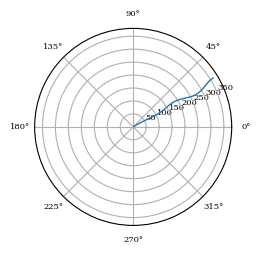

In [117]:
dat=np.loadtxt(dir+'time_wavepacket_distribution\\state01_v00_j00_pm00_wavepacket_polar_rot_ 2790ps.dat')
a=dat[:,0]
p=dat[:,1]
plt.polar(p,a)
